<a href="https://colab.research.google.com/github/alanpryoga/pnn-pima-indians-diabetes/blob/master/PNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

In [ ]:
# Load data
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Functions
def gaussian_pdf(xw, sigma):
  return math.exp(-(xw**2 / (2 * sigma**2)))

In [ ]:
# Preprocessing: Split data
features = diabetes.columns[:8]
X = diabetes[features]
y = diabetes["Outcome"]
diabetesxl=diabetes[:150]
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:150], y[100:150]
df = pd.DataFrame(diabetesxl)
df.to_excel(excel_writer = "150.xlsx")

In [ ]:
# Preprocessing: Data cleaning
X_train[features] = X_train[features].replace(0, np.NaN)
X_train["Pregnancies"].fillna(0, inplace=True)
X_train["Glucose"].fillna(X_train["Glucose"].mean(), inplace=True)
X_train["BloodPressure"].fillna(X_train["BloodPressure"].mean(), inplace=True)
X_train["SkinThickness"].fillna(X_train["SkinThickness"].mean(), inplace=True)
X_train["Insulin"].fillna(X_train["Insulin"].mean(), inplace=True)
X_train["BMI"].fillna(X_train["BMI"].mean(), inplace=True)

X_test[features] = X_test[features].replace(0, np.NaN)
X_test["Pregnancies"].fillna(0, inplace=True)
X_test["Glucose"].fillna(X_train["Glucose"].mean(), inplace=True)
X_test["BloodPressure"].fillna(X_train["BloodPressure"].mean(), inplace=True)
X_test["SkinThickness"].fillna(X_train["SkinThickness"].mean(), inplace=True)
X_test["Insulin"].fillna(X_train["Insulin"].mean(), inplace=True)
X_test["BMI"].fillna(X_train["BMI"].mean(), inplace=True)

print(X_train.isnull().sum())
print(X_test.isnull().sum())
X_train.to_csv("train_diabetes.csv")
X_test.to_csv("test_diabetes.csv")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [ ]:
# Preprocessing: Normalization
print(X_train["Pregnancies"].min())
print(X_train["Glucose"].min())
print(X_train["BloodPressure"].min())
print(X_train["SkinThickness"].min())
print(X_train["Insulin"].min())
print(X_train["BMI"].min())
print(X_train["DiabetesPedigreeFunction"].min())
print(X_train["Age"].min())
print("-----")
print(X_train["Pregnancies"].max())
print(X_train["Glucose"].max())
print(X_train["BloodPressure"].max())
print(X_train["SkinThickness"].max())
print(X_train["Insulin"].max())
print(X_train["BMI"].max())
print(X_train["DiabetesPedigreeFunction"].max())
print(X_train["Age"].max())
scaler = MinMaxScaler()
scaler.fit(X_train)
print(scaler)
X_train[features] = scaler.transform(X_train)
X_test[features] = scaler.transform(X_test)

train = pd.concat([X_train[features], y_train], axis=1)
X_train.head()

0.0
44.0
30.0
10.0
23.0
19.1
0.102
21
-----
15.0
197.0
110.0
60.0
846.0
49.7
2.2880000000000003
60
MinMaxScaler(copy=True, feature_range=(0, 1))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.400000,0.679739,0.525,0.500000,0.172810,0.473856,0.240165,0.743590
1,0.066667,0.267974,0.450,0.380000,0.172810,0.245098,0.113907,0.256410
2,0.533333,0.908497,0.425,0.385294,0.172810,0.137255,0.260750,0.282051
3,0.066667,0.294118,0.450,0.260000,0.086270,0.294118,0.029735,0.000000
4,0.000000,0.607843,0.125,0.500000,0.176185,0.784314,1.000000,0.307692


In [ ]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
100,0.066667,0.777778,0.5250,0.385294,0.172810,0.650327,0.512351,0.307692
101,0.066667,0.699346,0.3750,0.385294,0.172810,0.228758,0.035224,0.025641
102,0.000000,0.529412,0.8250,0.385294,0.172810,0.111111,0.073193,0.000000
103,0.066667,0.241830,0.5250,0.160000,0.020656,0.245098,0.082800,0.076923
104,0.133333,0.267974,0.4375,0.385294,0.172810,0.669935,0.378774,0.153846


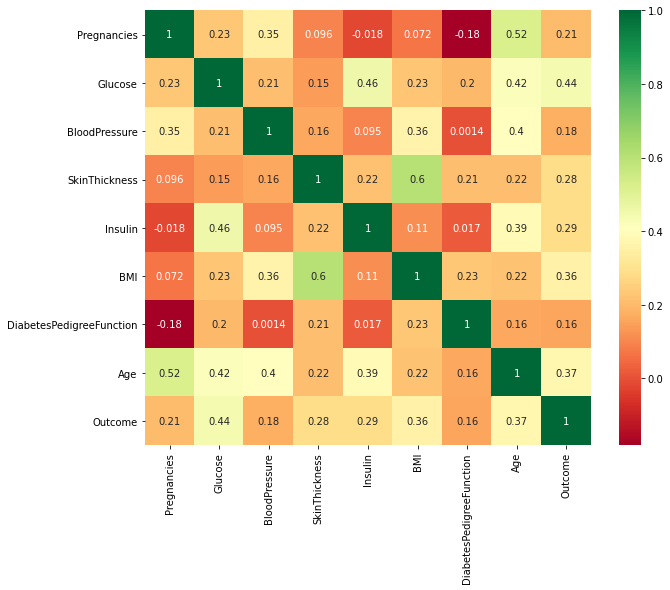

In [ ]:
# Preprocessing: Correlation
sns.heatmap(train.corr(method="pearson"), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
# Preprocessing: Seleksi fitur
features = ["Glucose","Age","Insulin","BMI","SkinThickness", "Pregnancies"]

X_train = X_train[features] # Treshold 0.2
X_test = X_test[features]

In [ ]:
# Modeling: Construct model

# Tahap pertama: 
# For setiap pola w_j
#   Bentuk unit pola dengan memasukkan vektor bobot w_j
W = X_train[features].values
print("W: %s" % W)

#   Hubungkan unit pola pada unit penjumlah untuk kelas C_k yang sesuai
def sample_indexes_for_category(C_k, y):
  indexes = [i for i, val in enumerate(y) if val == C_k]
  print("Samples for C_k=%s: %s" % (C_k, indexes))
  return indexes

C = y_train.unique()
print("Classes: %s" % C)

#   Tentukan konstanta |C_k| untuk setiap unit penjumlah
def count_category(C_k, y):
  return len(sample_indexes_for_category(C_k, y))

C_count = [count_category(C_k, y_train) for C_k in C]
print("C_Count: %s" % C_count)

# Tahap kedua:
# For setiap pola w_j
def find_d_j(j, y):
    # k = indeks kelas w_j
    C_k = y[j]
    k = np.where(C == C_k)[0][0]

    # Cari d_j: jarak dengan pola terdekat lain pada kelas k
    sample_indexes = sample_indexes_for_category(C_k, y)
    sample_indexes.remove(j)
    print('For W[%s]: C_k=%s k=%s. Sample indexes (other): %s' % (j, C_k, k, sample_indexes))
    d_j_list = [np.linalg.norm(W[j] - W[sample_index]) for sample_index in sample_indexes]
    d_j = np.amin(d_j_list) or 1.0
    print('d_j list: %s => d_j = %s' % (d_j_list, d_j))
    return d_j

#   d_tot[k] = d_tot[k] + d_j
def find_d_tot(C_k, y):
    return np.sum(find_d_j(j, y) for j in sample_indexes_for_category(C_k, y))

d_tot = np.array([find_d_tot(C_k, y_train) for C_k in C])

# Tentukan g (brute force)
g = 0.5

# For setiap kelas k
#   d_avg[k] = d_tot[k] / |C_k|
d_avg = d_tot / C_count
print('d_avg = %s' % d_avg)

#   sigma_k = g . d_avg[k]
sigmas = g * d_avg
print('sigmas = %s' % sigmas)

W: [[0.67973856 0.74358974 0.1728095  0.47385621 0.5        0.4       ]
 [0.26797386 0.25641026 0.1728095  0.24509804 0.38       0.06666667]
 [0.90849673 0.28205128 0.1728095  0.1372549  0.38529412 0.53333333]
 [0.29411765 0.         0.08626974 0.29411765 0.26       0.06666667]
 [0.60784314 0.30769231 0.17618469 0.78431373 0.5        0.        ]
 [0.47058824 0.23076923 0.1728095  0.2124183  0.38529412 0.33333333]
 [0.22222222 0.12820513 0.07897934 0.38888889 0.44       0.2       ]
 [0.46405229 0.20512821 0.1728095  0.52941176 0.38529412 0.66666667]
 [1.         0.82051282 0.63183475 0.37254902 0.7        0.13333333]
 [0.52941176 0.84615385 0.1728095  0.43096405 0.38529412 0.53333333]
 [0.43137255 0.23076923 0.1728095  0.60457516 0.38529412 0.26666667]
 [0.81045752 0.33333333 0.1728095  0.61764706 0.38529412 0.66666667]
 [0.62091503 0.92307692 0.1728095  0.26143791 0.38529412 0.66666667]
 [0.94771242 0.97435897 1.         0.35947712 0.26       0.06666667]
 [0.79738562 0.76923077 0.18469

In [ ]:
# Evaluation: Pengujian
preddata = []
for t in range(len(X_test)):
  x = np.array(X_test.iloc[t])

  probs = []
  for i, c in enumerate(C):
    ics = sample_indexes_for_category(c, y_train)
    gausses = []
    for j, ic in enumerate(ics):
      xw = math.sqrt(sum((x[k] - W[ic][k])**2 for k in range(len(x))))
      gauss = gaussian_pdf(xw, sigmas[i])
      gausses.append(gauss)
    sumgauss = sum(g for l, g in enumerate(gausses))
    prob = (1/(2 * math.pi**(len(x)/2) * (sigmas[i] ** len(x)) * C_count[i])) * sumgauss
    probs.append(prob)
  if probs[0] > probs[1]:
    preddata.append(1)
  else:
    preddata.append(0)

Samples for C_k=1: [0, 2, 4, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 31, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72, 78, 84, 88, 93, 99]
Samples for C_k=0: [1, 3, 5, 7, 10, 12, 18, 20, 21, 27, 28, 29, 30, 32, 33, 34, 35, 36, 40, 41, 42, 44, 46, 47, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98]
Samples for C_k=1: [0, 2, 4, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 31, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72, 78, 84, 88, 93, 99]
Samples for C_k=0: [1, 3, 5, 7, 10, 12, 18, 20, 21, 27, 28, 29, 30, 32, 33, 34, 35, 36, 40, 41, 42, 44, 46, 47, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98]
Samples for C_k=1: [0, 2, 4, 6, 8, 9, 11, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 31, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72

In [ ]:
# Evaluation: Confusion matrix
print(confusion_matrix(np.array(y_test), np.array(preddata)))

print("Akurasi: %.2f" % accuracy_score(np.array(y_test), np.array(preddata)))
print("Presisi: %.2f" % precision_score(np.array(y_test), np.array(preddata)))
print("Recall: %.2f" % recall_score(np.array(y_test), np.array(preddata)))
print("F1-score: %.2f" % f1_score(np.array(y_test), np.array(preddata)))

[[30  4]
 [ 6 10]]
Akurasi: 0.80
Presisi: 0.71
Recall: 0.62
F1-score: 0.67
